# Build Dataset

Use Pascal VOC Annotations to crop images with Yolo Format for own Implementations. 

Code adapted from: https://www.kaggle.com/code/divakarchoudhary/maskdetection 
with some parts adjusted for own implementation.

Dataset itself was retrieved from Joseph Nelson at Roboflow: https://universe.roboflow.com/joseph-nelson/mask-wearing

And the folder structure was adapted.

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import glob 
from xml.etree import ElementTree

In [2]:
annotations = "./dataset/annotations"
images = "./dataset/images"

In [3]:
paths0=[]
for dirname, _, filenames in os.walk(annotations):
    for filename in filenames:
        paths0+=[(os.path.join(dirname,filename))]

5899


In [4]:
paths1 = []
for dirname, _, filenames in os.walk(images):
    for filename in filenames:
        paths1+=[(os.path.join(dirname,filename))]

5899


In [5]:
# Extract necessary info present in the xml document in a dictionary format:

info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}

# Finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    # Parsing all xml files with element tree:
    tree=ElementTree.parse(i)
    # Getting all the neceesary attribute info into the dictionary:
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    info['file']+=[i.split('\\')[-1][0:-4]]
                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            
                            
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]


In [6]:
annotations_info_df = pd.DataFrame(info)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,1300,97,1435,277,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
1,463,148,578,306,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
2,621,144,770,326,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
3,1139,200,1221,339,without_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
4,1603,199,1711,341,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
5,1041,266,1148,425,without_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
6,33,2,175,70,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
7,1809,388,1944,542,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
8,891,450,1071,648,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363
9,571,3,711,126,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363


In [7]:
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.jpg'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,1300,97,1435,277,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg
1,463,148,578,306,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg
2,621,144,770,326,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg
3,1139,200,1221,339,without_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg
4,1603,199,1711,341,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg
...,...,...,...,...,...,...,...,...,...,...
12185,458,159,561,299,without_mask,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1,739,531,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1.xml,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1.jpg
12186,474,106,582,262,without_mask,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da,893,604,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.xml,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.jpg
12187,476,106,596,278,mask_weared_incorrect,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da,893,604,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.xml,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.jpg
12188,272,77,430,320,without_mask,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d,985,567,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d.xml,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d.jpg


In [8]:
# Used to render the image in  a 12:8 format:
def render(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()

# Since image read by opencv is in bgr format we need to convert it into rgb format:
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [11]:
try:
    # Creating new directory where Images will be placed:
    directory= 'cropped'
    parent_directory= "./dataset/cropped"
    os.mkdir(os.path.join(parent_directory,directory))

except FileExistsError:
    ...

In [12]:
# Adding Cropped image into annotation (just the file name):
annotations_info_df['cropped']=annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,1300,97,1435,277,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d
1,463,148,578,306,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d
2,621,144,770,326,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d
3,1139,200,1221,339,without_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d
4,1603,199,1711,341,with_mask,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d,2000,1363,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.xml,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d.jpg,-1x-1_jpg.rf.05ed7ddde850b8195dd95d7e3773ab4d
...,...,...,...,...,...,...,...,...,...,...,...
12185,458,159,561,299,without_mask,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1,739,531,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1.xml,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1.jpg,xx_JPG.rf.cc161a5cd2a2c2d9dc78abf0269a82e1
12186,474,106,582,262,without_mask,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da,893,604,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.xml,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.jpg,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da
12187,476,106,596,278,mask_weared_incorrect,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da,893,604,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.xml,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da.jpg,x_JPG.rf.26b58b0c64d50290a01e3149f0d106da
12188,272,77,430,320,without_mask,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d,985,567,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d.xml,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d.jpg,z_JPG.rf.19a430cf0f7867c7fe55c6b592e2728d


In [16]:

for i in range(len(annotations_info_df)):

    #selecting the filepath of a single image
    image_filepath= images + "\\" + annotations_info_df['image_file'].iloc[i]

    #reading the image
    image=cv2.imread(image_filepath)

    #adding the part and .jpg at the end of every file
    annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.jpg'
    cropped_image_filename= annotations_info_df['cropped'].iloc[i]

    #getting the dimension needed to get a cropped images
    xmin= annotations_info_df['xmin'].iloc[i]
    ymin= annotations_info_df['ymin'].iloc[i]
    xmax= annotations_info_df['xmax'].iloc[i]
    ymax= annotations_info_df['ymax'].iloc[i]

    #cropping the image to get a single face and it  to croppedimage 
    croppedimage= image[ymin:ymax, xmin:xmax]
    try:

        if annotations_info_df['label'].iloc[i] == "without_mask":
            cv2.imwrite(os.path.join('./dataset/cropped/without',cropped_image_filename),croppedimage)

        elif annotations_info_df['label'].iloc[i] == "with_mask":
            cv2.imwrite(os.path.join('./dataset/cropped/with',cropped_image_filename),croppedimage)

        else:
            cv2.imwrite(os.path.join('./dataset/cropped/else',cropped_image_filename),croppedimage)
    except:
            ...

C:\Users\Slavka\AppData\Local\Temp\ipykernel_19988\2536960206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.jpg'


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


C:\Users\Slavka\AppData\Local\Temp\ipykernel_1704\2506108679.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


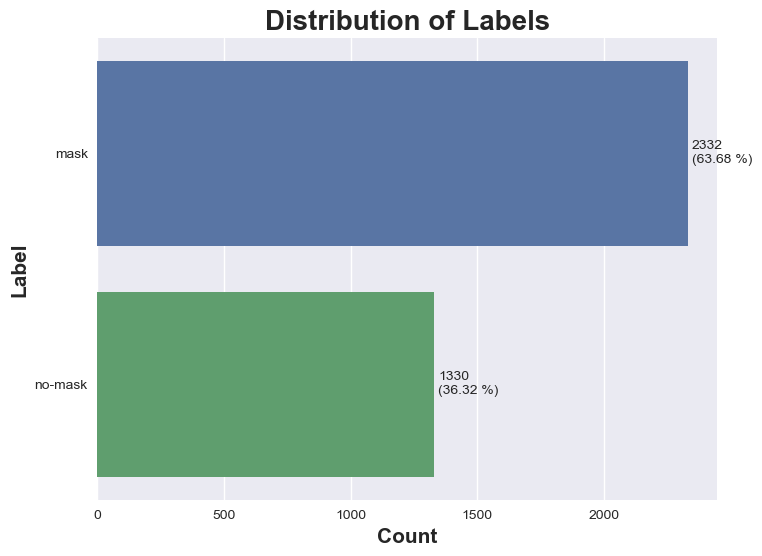

In [72]:
#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(annotations_info_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

import seaborn as sns 

#plotting the barplot of the label occurred
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    #to calculate percentage of each label in the data specified
    percentage = round(width * 100 / sum(sortedlabel['count']), 2)
    #putting text about the numer and the percentage corresponding to each label
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()